<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [ ]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



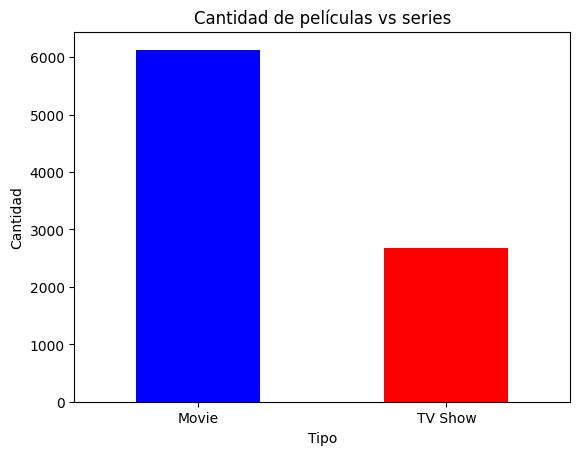

In [24]:
#1
#normalizar
df.columns = df.columns.str.lower().str.strip()

conteo = df["type"].value_counts()

#graficar
conteo.plot(kind="bar", color=["blue", "red"])
plt.title("Cantidad de películas vs series")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()

El más predominante es Movies, por lo que los usuarios pueden estar prefiriendo consumir un contenido más corto que algo de mayor duración que puede llevar hasta meses esperando a un nuevo capitulo como en las series.

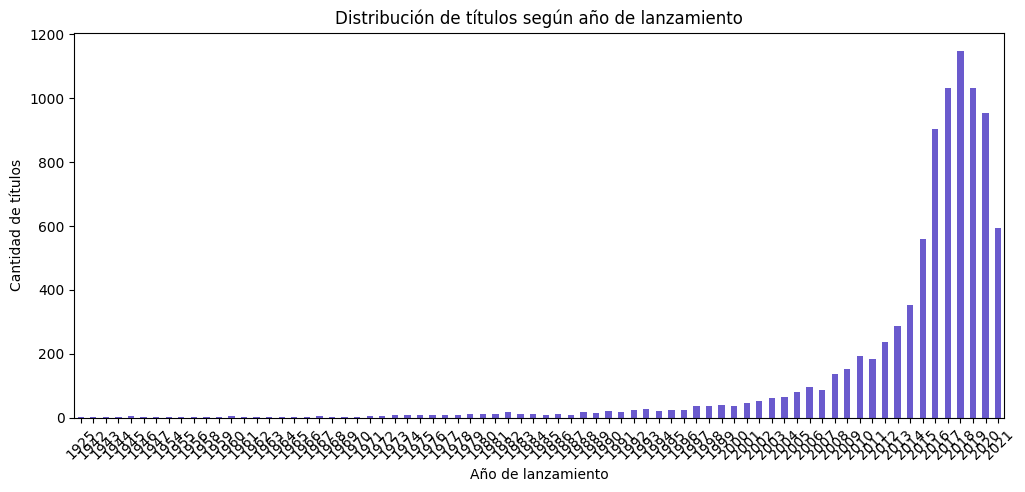

In [8]:
#2
conteo_year = df["release_year"].value_counts().sort_index()
#graficar
conteo_year.plot(kind="bar", figsize=(12,5), color="slateblue")
plt.title("Distribución de títulos según año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()

Hay más contenido reciente, y se nota un aumento en la decada de los 2010 a 2020. En 2021 hubo un bajón, quizá debido a la pandemia.

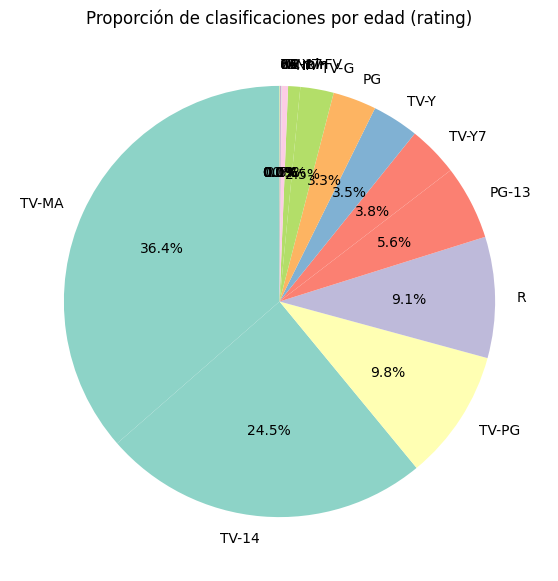

In [10]:
#3
conteo_rating = df["rating"].value_counts()
#circular
plt.figure(figsize=(7,7))
conteo_rating.plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="Set3")
plt.ylabel("")
plt.title("Proporción de clasificaciones por edad (rating)")
plt.show()


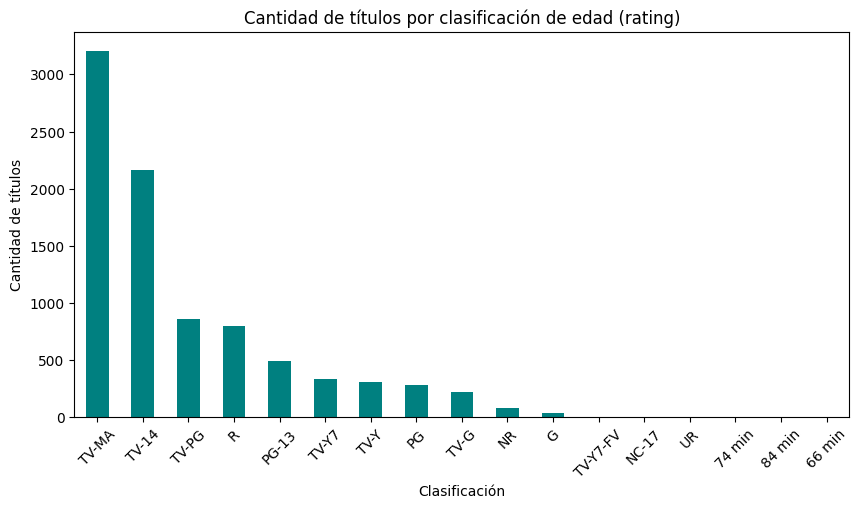

In [11]:
#barras
plt.figure(figsize=(10,5))
conteo_rating.plot(kind="bar", color="teal")
plt.title("Cantidad de títulos por clasificación de edad (rating)")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()

La más común es TV-MA, la cual es para mayores de 18 años, o sea un público adulto.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


In [ ]:
#4
#eliminar espacios
df["date_added"] = df["date_added"].str.strip()

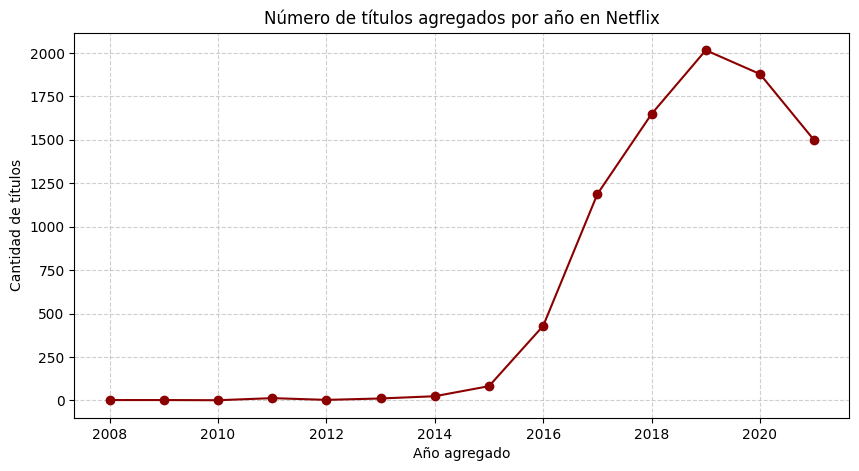

In [18]:
#4
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
conteo_year_add = df["year_added"].value_counts().sort_index()

#grafico
plt.figure(figsize=(10,5))
conteo_year_add.plot(kind="line", marker="o", color="darkred")
plt.title("Número de títulos agregados por año en Netflix")
plt.xlabel("Año agregado")
plt.ylabel("Cantidad de títulos")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Creció más entre el 2018 al 2019. Netflix se lanzó de manera oficial para más de 190 paises en 2016, por lo que ya instalada en muchos mercados, la compañía comenzó a invertir más en producciones locales, series y películas hechas en distintos países para atraer suscriptores de sus respectivas regiones

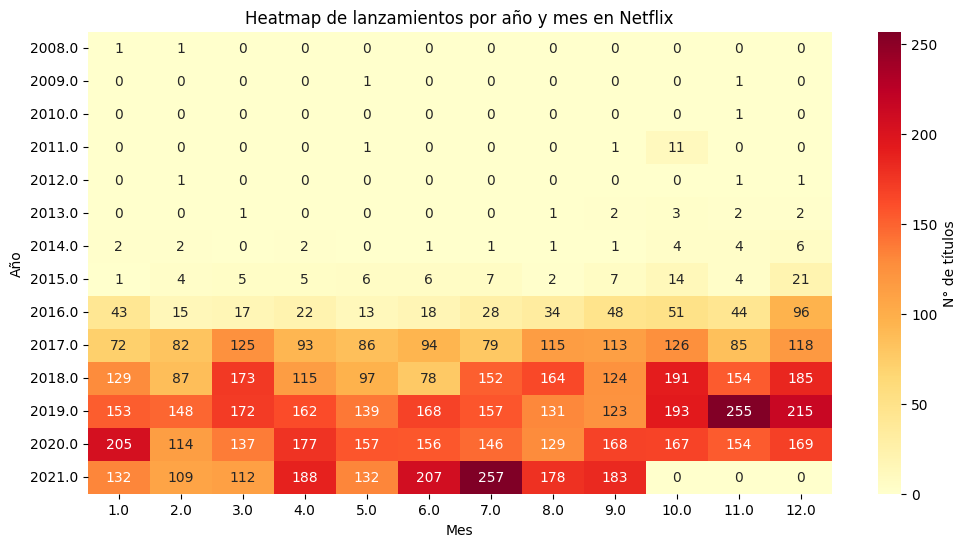

In [20]:
#5
#df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors="coerce")
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
pivot_table = df.pivot_table(
    index="year_added",
    columns="month_added",
    values="show_id",
    aggfunc="count",
    fill_value=0
)
#grafico
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt="d", cbar_kws={'label': 'N° de títulos'})

plt.title("Heatmap de lanzamientos por año y mes en Netflix")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()

Si, se ve que Frebrero y Mayo no son meses donde se lancen muchos titulos, a diferencia de Octubre, Noviembre y Diciembre donde se ve mayor cantidad de titulos lanzados. Quizás por las festevidades que vienen esos días, la gente consume más ese tipo de contenido con esa tematica.

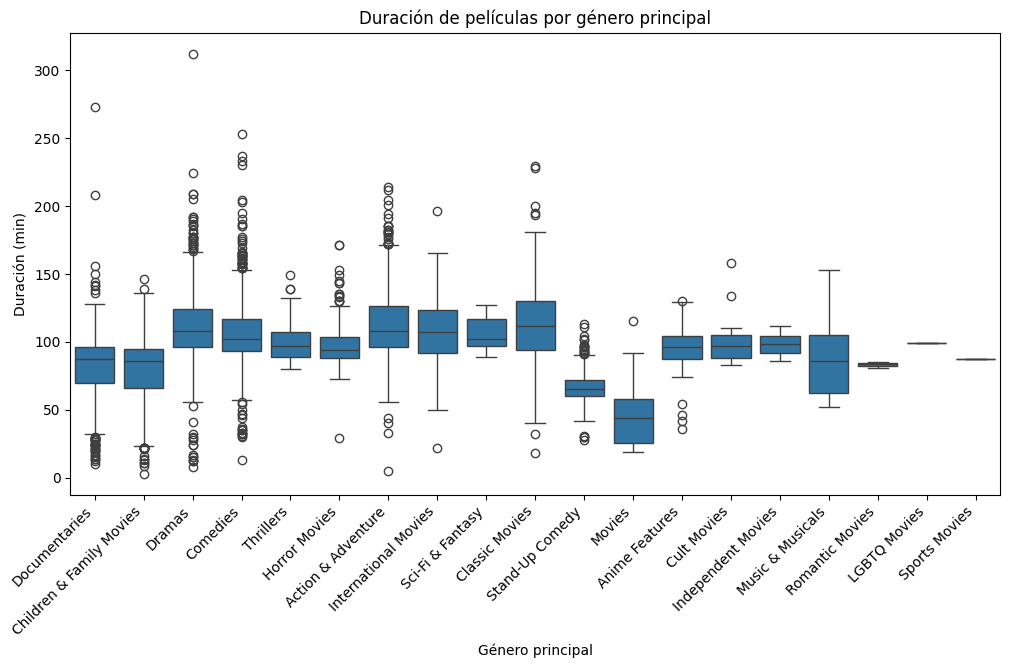

In [25]:
#6
movies = df[df["type"] == "Movie"].copy()
movies["duration_min"] = movies["duration"].str.replace(" min", "", regex=False).astype(float)
movies["main_genre"] = movies["listed_in"].str.split(",").str[0].str.strip()

#boxtop
plt.figure(figsize=(12,6))
sns.boxplot(data=movies, x="main_genre", y="duration_min")

plt.title("Duración de películas por género principal")
plt.xlabel("Género principal")
plt.ylabel("Duración (min)")
plt.xticks(rotation=45, ha="right")
plt.show()


El género International Movies, Action & Adventure y Classic Movies tienen la línea de la mediana más alta, ubicada aproximadamente en 120 minutos. Esto significa que la mitad de las películas de este género duran más de 120 minutos.
En este caso, la variabilidad dentro de un género se refiere a cuán dispersas o agrupadas están las duraciones de las películas de ese género



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



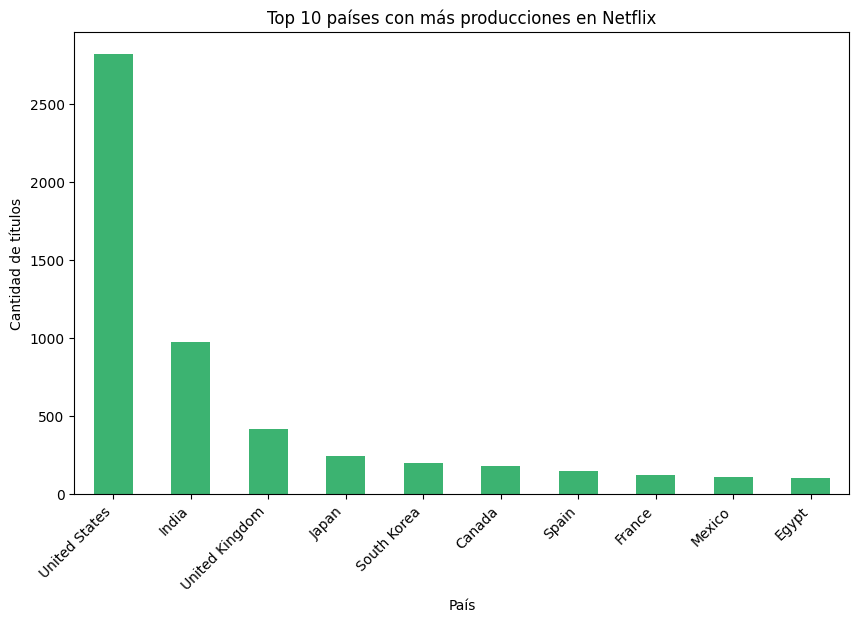

In [26]:
#7
conteo_paises = df["country"].value_counts().head(10)
#grafico
plt.figure(figsize=(10,6))
conteo_paises.plot(kind="bar", color="mediumseagreen")
plt.title("Top 10 países con más producciones en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.show()

La lideran USA e India. Es esperada, asumiendo que son de los paises con mayor población del mundo.

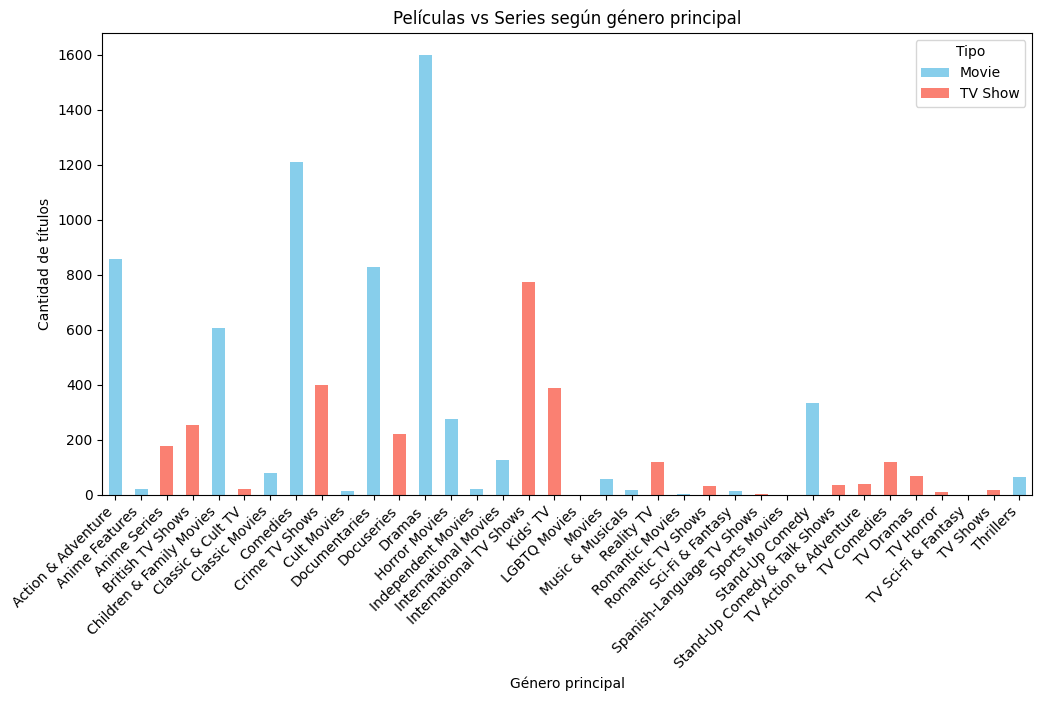

In [27]:
#8
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()
tabla = pd.crosstab(df["main_genre"], df["type"])
#grafico
tabla.plot(kind="bar", stacked=True, figsize=(12,6), color=["skyblue", "salmon"])
plt.title("Películas vs Series según género principal")
plt.xlabel("Género principal")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo")
plt.show()

Si, por el gráfico, Dramas está más asociado a peliculas, mientras que International TV Shows está más asociado a series.

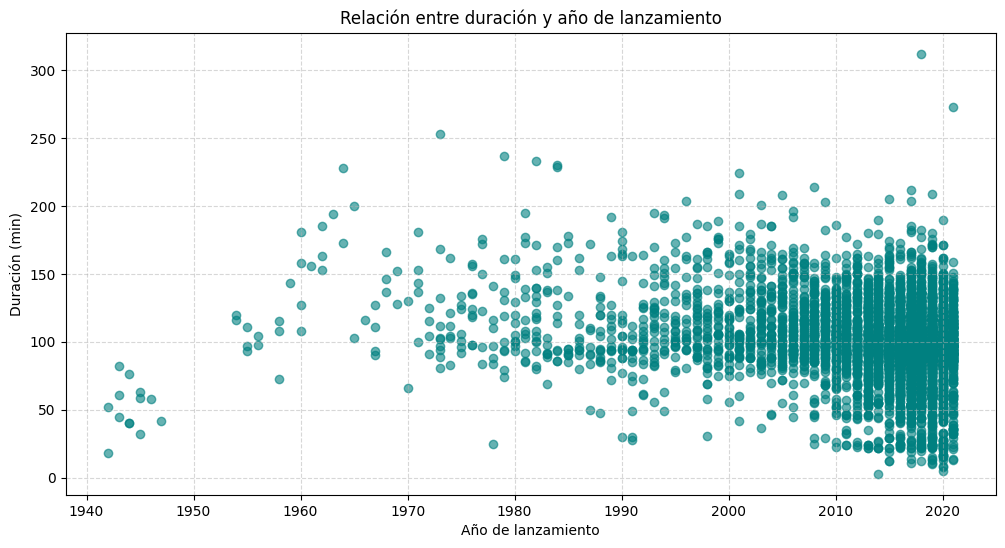

In [29]:
#9
movies = df[df["type"] == "Movie"].copy()
movies["duration_min"] = movies["duration"].str.replace(" min", "", regex=False).astype(float)
#scatterplot
plt.figure(figsize=(12,6))
plt.scatter(movies["release_year"], movies["duration_min"], alpha=0.6, color="teal")

plt.title("Relación entre duración y año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (min)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Los estándares de duración de las películas no han cambiado significativamente, manteniéndose la mayoría en el rango de 90 a 120 minutos. Sin embargo, a partir de 1960, la variabilidad de la duración parece haber aumentado, con más películas que superan los 150 minutos. Los outliers más interesantes son películas extremadamente largas lanzadas en los últimos años y varias películas cortas en las primeras décadas.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME

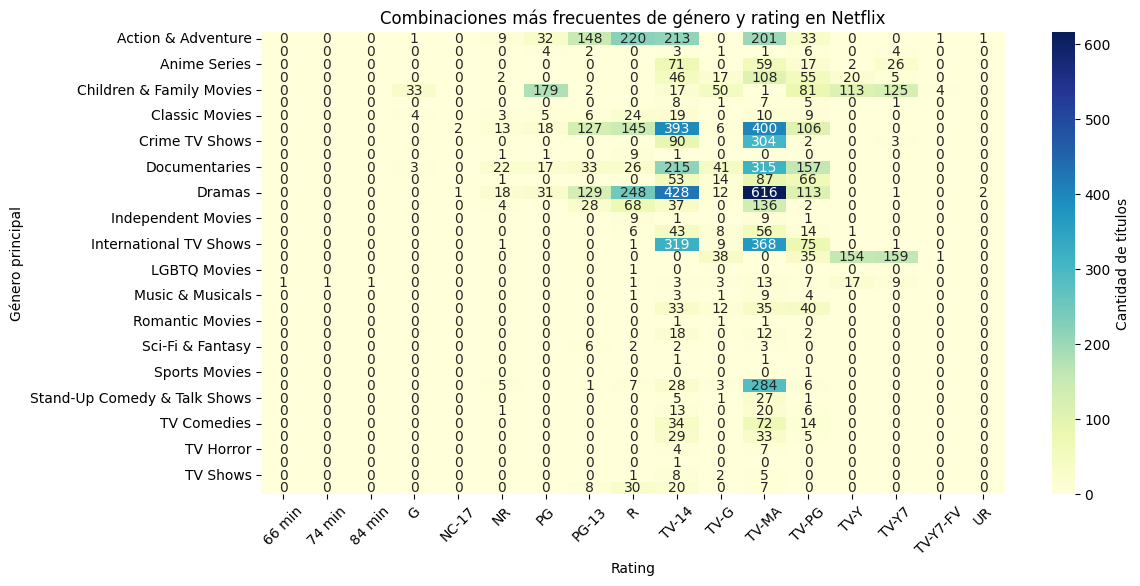

In [30]:
df["main_genre"] = df["listed_in"].str.split(",").str[0].str.strip()
tabla = pd.crosstab(df["main_genre"], df["rating"])
#grafico
plt.figure(figsize=(12,6))
sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Cantidad de títulos'})
plt.title("Combinaciones más frecuentes de género y rating en Netflix")
plt.xlabel("Rating")
plt.ylabel("Género principal")
plt.xticks(rotation=45)
plt.show()

Los géneros más dirigidos a un público adulto son Dramas, TV Dramas y Crime TV Shows, con un gran número de títulos en los ratings TV-MA y R. El público familiar o infantil está más representado por los géneros Children & Family Movies y Anime Series, concentrados en ratings como G, PG y TV-G.